# Work balance analysis of Amazon company's employees in California 

### Group H: Eugenio Baldo, Stefania Sferragatta, Clara Lecce

In [1]:
from script import *

In [3]:
amazon = pd.read_csv('datasets/amazon.csv')
del amazon['Unnamed: 0']
amazon.columns= ['company','location','job-title','overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars','helpful_count','year']
fields = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
summary_amazon = amazon[fields].describe().transpose()

In [4]:
summary_amazon

,count,mean,std,min,25%,50%,75%,max
overall_ratings,16806.0,3.583363,1.298495,1.0,3.0,4.0,5.0,5.0
work_balance_stars,16806.0,3.040045,1.330507,1.0,2.0,3.0,4.0,5.0
culture_values_stars,16806.0,3.545549,1.355461,1.0,3.0,4.0,5.0,5.0
carrer_opportunities_stars,16806.0,3.603558,1.308810,1.0,3.0,4.0,5.0,5.0
comp_benefit_stars,16806.0,3.697995,1.122853,1.0,3.0,4.0,5.0,5.0
senior_mangemnet_stars,16806.0,3.184720,1.352742,1.0,2.0,3.0,4.0,5.0


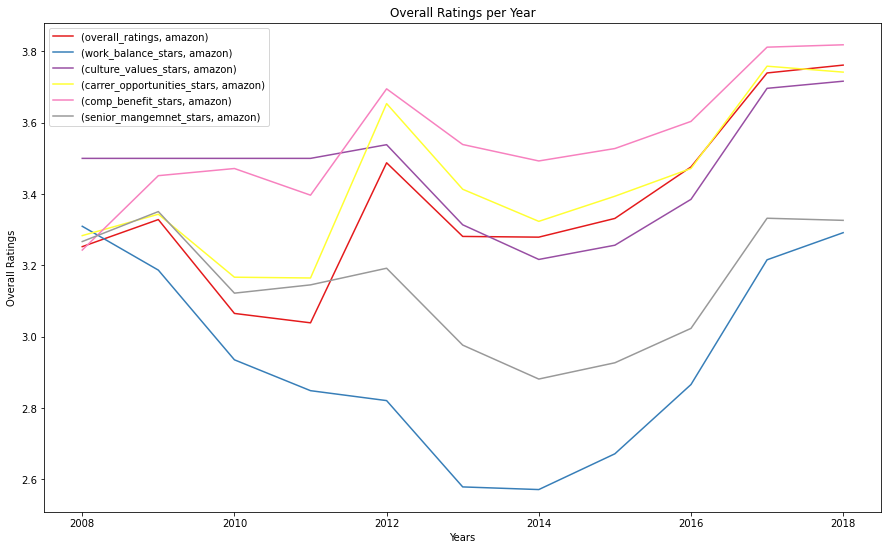

In [5]:
#Ratings over time for Facebook
fig, ax = plt.subplots(figsize=(15,9))
keys = ['year','company']
lines = ['overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']
amazon.groupby(keys)[lines].mean().unstack().plot(ax=ax,colormap = 'Set1')
_ = plt.xlabel("Years")
_ = plt.ylabel("Overall Ratings")
_ = plt.title("Overall Ratings per Year")
_ = plt.legend()

In [6]:
corr_az = corr_matrix(amazon)
corr_az

,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,Job_code,Locations_code
overall_ratings,1.000000,0.658603,0.755126,0.721668,0.543276,0.735683,-0.046776,-0.200076,-0.047963
work_balance_stars,0.658603,1.000000,0.621683,0.510959,0.431752,0.625463,-0.041221,-0.165288,-0.076880
culture_values_stars,0.755126,0.621683,1.000000,0.646568,0.474040,0.726017,-0.039420,-0.182097,-0.066981
carrer_opportunities_stars,0.721668,0.510959,0.646568,1.000000,0.550387,0.673629,-0.031245,-0.177432,0.007209
comp_benefit_stars,0.543276,0.431752,0.474040,0.550387,1.000000,0.498529,-0.018262,-0.100112,-0.024205
senior_mangemnet_stars,0.735683,0.625463,0.726017,0.673629,0.498529,1.000000,-0.027556,-0.176707,-0.005506
helpful_count,-0.046776,-0.041221,-0.039420,-0.031245,-0.018262,-0.027556,1.000000,0.011693,0.039050
Job_code,-0.200076,-0.165288,-0.182097,-0.177432,-0.100112,-0.176707,0.011693,1.000000,0.023938
Locations_code,-0.047963,-0.076880,-0.066981,0.007209,-0.024205,-0.005506,0.039050,0.023938,1.000000


#### Probabilistic and graphical models

In [7]:
df_train_az = get_train_df(amazon)
df_train_az.head()

,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars
9835,1,1,3,4,2
1530,3,3,3,3,3
13047,4,5,4,5,4
1262,2,4,5,4,3
4044,5,5,5,5,4


  0%|                                                                            | 7/1000000 [00:00<7:10:36, 38.71it/s]



[('work_balance_stars', 'comp_benefit_stars'), ('culture_values_stars', 'senior_mangemnet_stars'), ('culture_values_stars', 'work_balance_stars'), ('culture_values_stars', 'carrer_opportunities_stars'), ('carrer_opportunities_stars', 'comp_benefit_stars'), ('senior_mangemnet_stars', 'carrer_opportunities_stars'), ('senior_mangemnet_stars', 'work_balance_stars')]


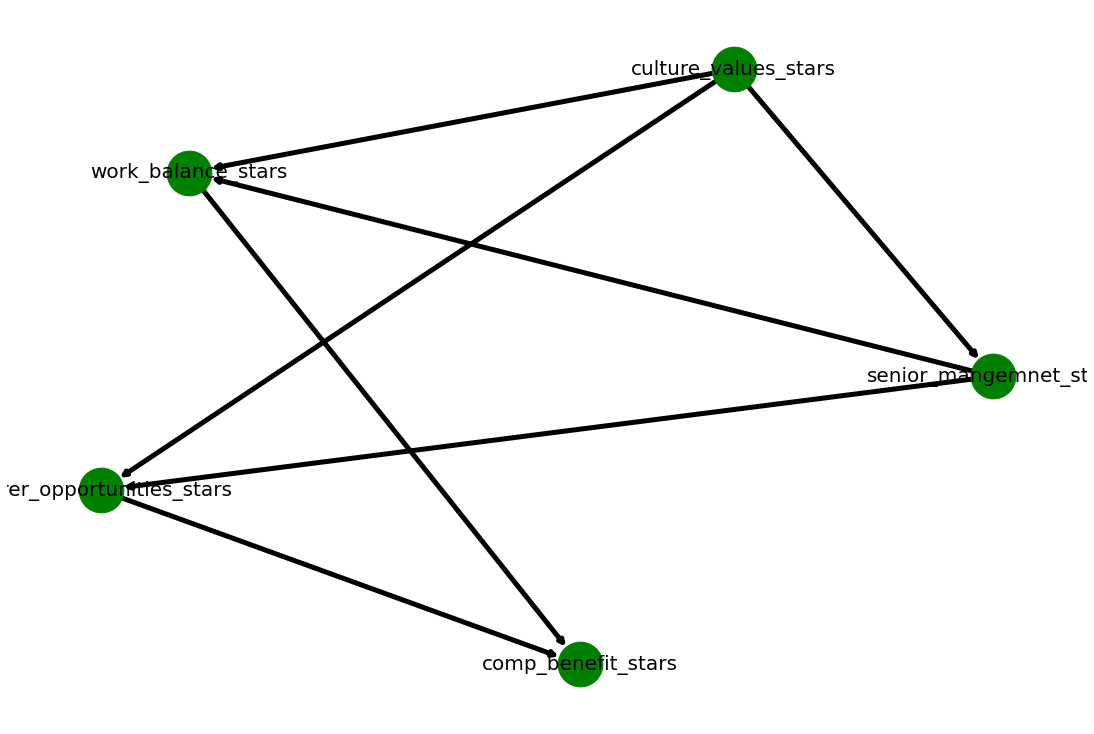

In [8]:
hc = HillClimbSearch(df_train_az, scoring_method=K2Score(df_train_az))  #use the training set to build the model
#The score to be optimized during structure estimation.  
#  Supported structure scores: k2score, bdeuscore, bicscore.
best_model = hc.estimate()
print(best_model)
edges = list(best_model.edges())
print(edges)
model = BayesianModel(edges)

%matplotlib inline
plt.figure(figsize=(15,10))

nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000,
        node_color="green", width = 5, font_size = 20)
plt.show()

In [18]:
causal_graph_az = """
digraph {
work_balance_stars;
carrer_opportunities_stars;
comp_benefit_stars;
senior_mangemnet_stars;

culture_values_stars -> senior_mangemnet_stars;
culture_values_stars -> work_balance_stars
senior_mangemnet_stars -> work_balance_stars;
culture_values_stars -> carrer_opportunities_stars;
senior_mangemnet_stars -> carrer_opportunities_stars
carrer_opportunities_stars -> comp_benefit_stars; 
work_balance_stars -> comp_benefit_stars; 
}
"""

### Focus on the relation between culture_values_stars and work_balance

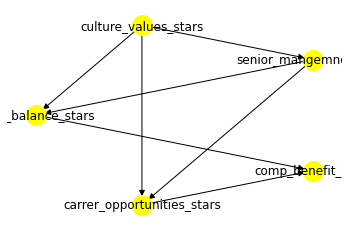

In [19]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='culture_values_stars'

model_az= CausalModel(
        data = df_train_az,
        graph=causal_graph_az.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_az.view_model()
# display(Image(filename='causal_model.png'))

In [9]:
model.fit(df_train_az, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [10]:
print(infer.query(variables=['work_balance_stars', 'culture_values_stars'], joint= True))

Finding Elimination Order: : 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 373.95it/s]

Eliminating: comp_benefit_stars: 100%|███████████████████████████████████████████████████| 3/3 [00:00<00:00, 75.00it/s]

+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars    | culture_values_stars    |   phi(work_balance_stars,culture_values_stars) |
+=======================+=========================+================================================+
| work_balance_stars(1) | culture_values_stars(1) |                                         0.0881 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(2) |                                         0.0355 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(3) |                                         0.0345 |
+-----------------------+-------------------------+------------------------------------------------+
| work_balance_stars(1) | culture_values_stars(4) |                                        

In [11]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'culture_values_stars': i}))

Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 142.76it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: senior_mangemnet_stars:   0%|                                                       | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.47it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                         

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6852 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1590 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1034 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0293 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0231 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.3800 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 218.85it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: senior_mangemnet_stars:   0%|                                                       | 0/3 [00:00<?, ?it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0638 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1745 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.3227 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.3462 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0929 |
+-----------------------+---------------------------+




Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.38it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0309 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0702 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1966 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.3085 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.3938 |
+-----------------------+---------------------------+


In [12]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'culture_values_stars': i}))



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]


Eliminating: senior_mangemnet_stars:   0%|                                                       | 0/3 [00:00<?, ?it/s]


Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.47it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]



  0%|                

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6852 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1590 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1034 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0293 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0231 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.3800 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   





  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]




Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]




Eliminating: senior_mangemnet_stars:   0%|                                                       | 0/3 [00:00<?, ?it/s]




Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.31it/s]







+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.1445 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2093 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.4452 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.1437 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0573 |
+-----------------------+---------------------------+


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]




Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]





  0%|                                                                                            | 0/3 [00:00<?, ?it/s]





Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]





Eliminating: senior_mangemnet_stars:   0%|                                                       | 0/3 [00:00<?, ?it/s]





Eliminating: comp_benefit_stars: 100%|██████████████████████████████████████████████████| 3/3 [00:00<00:00, 374.95it/s]






  0%|                                                                                            | 0/3 [00:00<?, ?it/s]





Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]







+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0638 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.1745 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.3227 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.3462 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0929 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0309 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   

In [15]:
estimands = model_az.identify_effect()

In [16]:
estimate = model_az.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                            
──────────────────────(Expectation(work_balance_stars))
d[cultureᵥₐₗᵤₑₛ ₛₜₐᵣₛ]                                 
Estimand assumption 1, Unconfoundedness: If U→{culture_values_stars} and U→work_balance_stars then P(work_balance_stars|culture_values_stars,,U) = P(work_balance_stars|culture_values_stars,)

## Realized estimand
b: work_balance_stars~culture_values_stars
Target units: ate

## Estimate
Mean value: 0.6075632270712917
p-value: [0.]
95.0% confidence interval: [[0.5864561  0.62867036]]



In [17]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel = model_az.refute_estimate(estimands,estimate, mode)
    print(refutel)

Refute: Add a Random Common Cause
Estimated effect:0.6075632270712917
New effect:0.6075065517911852

Refute: Use a subset of data
Estimated effect:0.6075632270712917
New effect:0.6072235329928375
p value:0.48

Refute: Use a Placebo Treatment
Estimated effect:0.6075632270712917
New effect:0.0032098664136330957
p value:0.45



### Focus on the relation between senior_mangment_stars and work_balance

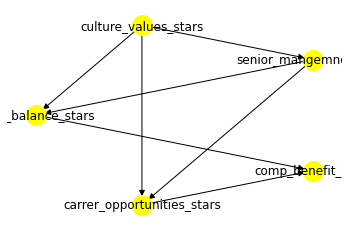

In [20]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='senior_mangemnet_stars'

model_az= CausalModel(
        data = df_train_az,
        graph=causal_graph_az.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_az.view_model()
# display(Image(filename='causal_model.png'))

In [9]:
model.fit(df_train_az, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

In [21]:
print(infer.query(variables=['work_balance_stars', 'senior_mangemnet_stars'], joint= True))

Finding Elimination Order: : 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 407.73it/s]

Eliminating: culture_values_stars: 100%|█████████████████████████████████████████████████| 3/3 [00:00<00:00, 92.31it/s]

+---------------------------+-----------------------+--------------------------------------------------+
| senior_mangemnet_stars    | work_balance_stars    |   phi(senior_mangemnet_stars,work_balance_stars) |
+===========================+=======================+==================================================+
| senior_mangemnet_stars(1) | work_balance_stars(1) |                                           0.1037 |
+---------------------------+-----------------------+--------------------------------------------------+
| senior_mangemnet_stars(1) | work_balance_stars(2) |                                           0.0349 |
+---------------------------+-----------------------+--------------------------------------------------+
| senior_mangemnet_stars(1) | work_balance_stars(3) |                                           0.0182 |
+---------------------------+-----------------------+--------------------------------------------------+
| senior_mangemnet_stars(1) | work_balance_stars(4) |  

In [22]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'senior_mangemnet_stars': i}))

Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 374.04it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]

Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]

Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.94it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Eliminating: carrer_opportunitie

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6074 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2044 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1069 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0476 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0337 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.2833 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]


Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]


Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 351.56it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0211 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0411 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1522 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.2967 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.4890 |
+-----------------------+---------------------------+


In [23]:
for i in range(1,6):
    print(infer.query(variables=['work_balance_stars'], evidence={'senior_mangemnet_stars': i}))




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



Eliminating: carrer_opportunities_stars:   0%|                                                   | 0/3 [00:00<?, ?it/s]



Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]



Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 236.83it/s]




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]




  0%|       

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.6074 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.2044 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1069 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.0476 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.0337 |
+-----------------------+---------------------------+
+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.2833 |
+-----------------------+---------------------------+
| work_balance_stars(2) |   



Eliminating: comp_benefit_stars:   0%|                                                           | 0/3 [00:00<?, ?it/s]

Eliminating: culture_values_stars: 100%|████████████████████████████████████████████████| 3/3 [00:00<00:00, 188.69it/s]

+-----------------------+---------------------------+
| work_balance_stars    |   phi(work_balance_stars) |
+=======================+===========================+
| work_balance_stars(1) |                    0.0211 |
+-----------------------+---------------------------+
| work_balance_stars(2) |                    0.0411 |
+-----------------------+---------------------------+
| work_balance_stars(3) |                    0.1522 |
+-----------------------+---------------------------+
| work_balance_stars(4) |                    0.2967 |
+-----------------------+---------------------------+
| work_balance_stars(5) |                    0.4890 |
+-----------------------+---------------------------+


In [24]:
estimands = model_az.identify_effect()

In [25]:
estimate = model_az.estimate_effect(estimands,
                                 method_name = 'backdoor.linear_regression',
                                 test_significance=True, confidence_intervals=True)                           
print(estimate)

Finding Elimination Order: : 100%|███████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.71s/it]

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
─────────────────────────(Expectation(work_balance_stars|culture_values_stars)
d[senior_mangemnet_stars]                                                     

 
)
 
Estimand assumption 1, Unconfoundedness: If U→{senior_mangemnet_stars} and U→work_balance_stars then P(work_balance_stars|senior_mangemnet_stars,culture_values_stars,U) = P(work_balance_stars|senior_mangemnet_stars,culture_values_stars)

## Realized estimand
b: work_balance_stars~senior_mangemnet_stars+culture_values_stars
Target units: ate

## Estimate
Mean value: 0.3701121705013466
p-value: [1.67127829e-128]
95.0% confidence interval: [[0.34089128 0.39933306]]



In [26]:
methods = ["random_common_cause","data_subset_refuter","placebo_treatment_refuter"]
for mode in methods:
    refutel = model_az.refute_estimate(estimands,estimate, mode)
    print(refutel)

Refute: Add a Random Common Cause
Estimated effect:0.3701121705013466
New effect:0.3701248900388887

Refute: Use a subset of data
Estimated effect:0.3701121705013466
New effect:0.3713994100473
p value:0.49

Refute: Use a Placebo Treatment
Estimated effect:0.3701121705013466
New effect:-0.0006435896172444711
p value:0.46

